In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import detrend, butter, filtfilt
import scipy.io


In [8]:
SAMPLE_RATE = 9000
FILE_PATH_RAW = "raw_data/normal/10Hz_accelerometer.txt"
FILE_PATH_MAT = "mat_data/notfiltered/normal/10Hz_accelerometer.mat"

In [9]:

def read_data_mat(FILE_PATH):
    Bearing_data = scipy.io.loadmat(FILE_PATH)
    label = None
    for key in Bearing_data.keys():
        if "DE_time" in key:
            label = key
            break
    return Bearing_data[label].flatten()

In [10]:
def read_data_raw(FILE_PATH_RAW):
    header = []
    data = []
    with open(FILE_PATH_RAW, 'r') as file:
        for line in file:
            line = line.strip()
            if line == "Data as Time Sequence:":
                break
            if line:  
                header.append(line)
        
        for line in file:
            line = line.strip()
            if line:  
                try:
                    value = float(line)
                    data.append(value)
                except ValueError:
                    continue  
    return data, header

In [ ]:
def plot_signal_spectrum(signal, sampling_rate, min_x = 0.5, max_x = SAMPLE_RATE // 2):
    n = len(signal)
    freq = np.fft.fftfreq(n, d=1/sampling_rate)
    fft_values = np.fft.fft(signal)
    magnitude = np.abs(fft_values)
    half_n = n // 2
    freq = freq[:half_n]
    magnitude = magnitude[:half_n]
    plt.figure(figsize=(10, 6))
    plt.plot(freq, np.log10(magnitude))
    plt.xlim([min_x, max_x])
    plt.ylim([-5, 5])
    plt.title('Signal Spectrum')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.grid(True)
    plt.show()

In [ ]:
signal = read_data_mat(FILE_PATH_MAT)
print(len(signal))
plot_signal_spectrum(signal, SAMPLE_RATE)

FileNotFoundError: [Errno 2] No such file or directory: 'mat_data/notfiltered/normal/10Hz_accelerometer.mat'

In [ ]:
def find_peak_frequency_in_range(signal, sampling_rate, f_min, f_max):
    n = len(signal)
    freq = np.fft.rfftfreq(n, d=1/sampling_rate)
    fft_values = np.fft.rfft(signal)
    magnitude = np.abs(fft_values)
    mask = (freq >= f_min) & (freq <= f_max)
    freq_in_range = freq[mask]
    magnitude_in_range = magnitude[mask]
    
    if len(magnitude_in_range) == 0:
        return None, None
    max_index = np.argmax(magnitude_in_range)
    peak_frequency = freq_in_range[max_index]
    peak_amplitude = magnitude_in_range[max_index]
    return peak_frequency, peak_amplitude

In [ ]:
peak_freq, peak_vibr = find_peak_frequency_in_range(signal, SAMPLE_RATE, 1, 30)
print(peak_freq, peak_vibr)


3.5997200217760845 18.92472088604358


In [ ]:

def butter_bandstop(lowcut, highcut, fs, order=6):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='bandstop')
    return b, a

def butter_bandstop_filter(data, lowcut, highcut, fs, order=6):
    b, a = butter_bandstop(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)
    return y

In [ ]:
lowcut = peak_freq - 2
highcut = peak_freq + 2
filtered_signal = butter_bandstop_filter(signal, lowcut, highcut, SAMPLE_RATE, order=2)

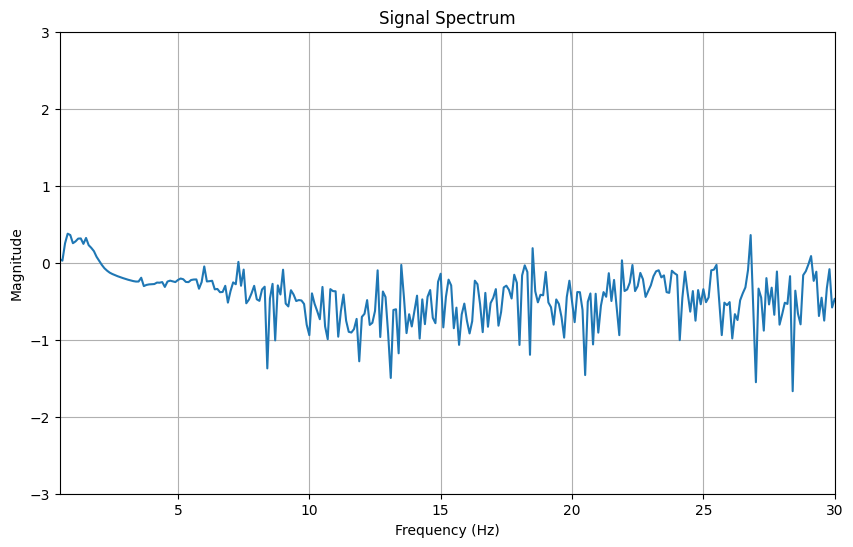

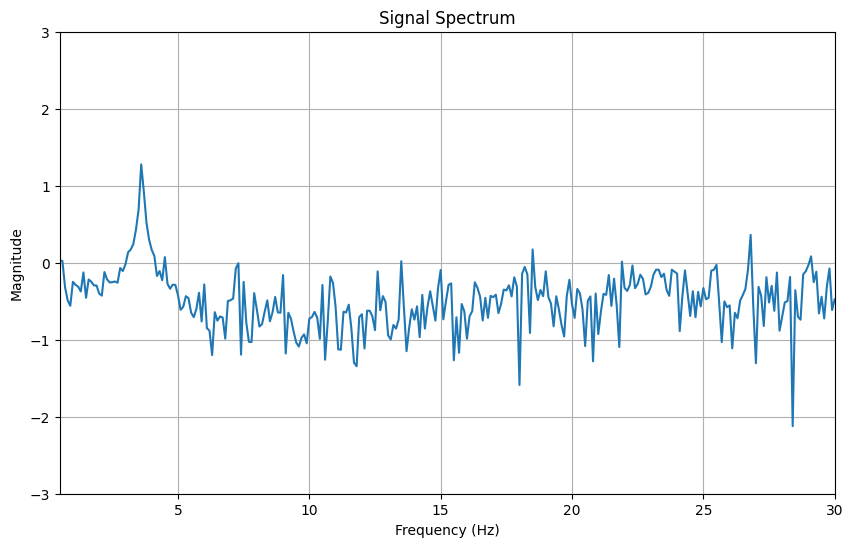

In [ ]:

plot_signal_spectrum(filtered_signal, SAMPLE_RATE)
plot_signal_spectrum(signal, SAMPLE_RATE)

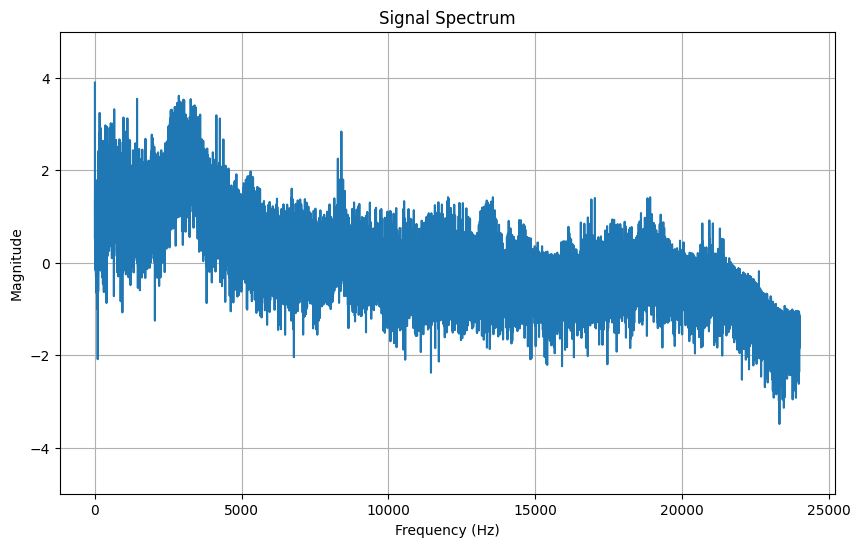

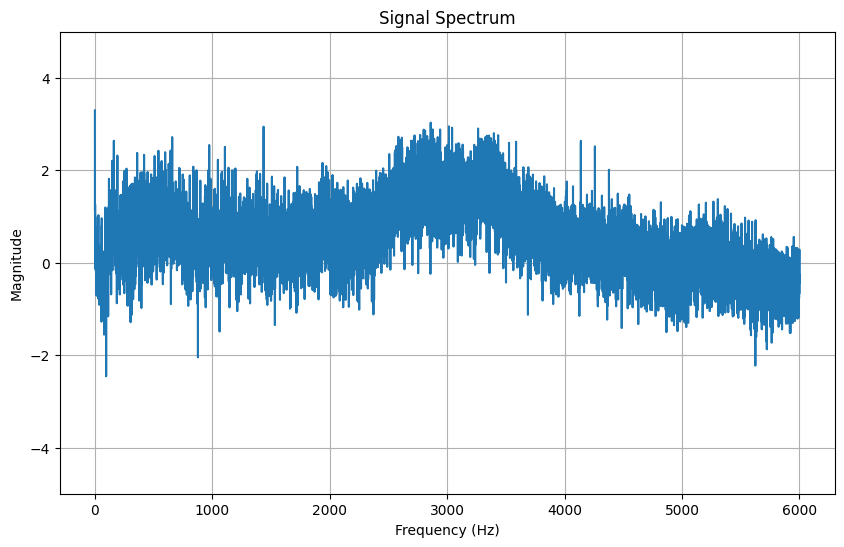

In [15]:
raw_signal = read_data_mat("Data/48k_DE/B007_0.mat")
plot_signal_spectrum(raw_signal, 48000, 1, 6000)

raw_signal = read_data_mat("Data/48k_12k/B007_0.mat")
plot_signal_spectrum(raw_signal, 12000, 1, 6000)
